A simulação de Monte Carlo permite experimentar diferentes tamanhos de amostra e observar empiricamente quando a distribuição das médias amostrais começa a se comportar como uma distribuição normal. Isso ajuda a determinar um tamanho de amostra adequado para aplicar o Teorema Central do Limite, especialmente em casos onde a distribuição original é altamente assimétrica ou possui caudas longas.
Observe os histogramas gerados para cada tamanho de amostra. À medida que o tamanho da amostra aumenta, a forma do histograma das médias amostrais deve se aproximar cada vez mais da curva normal teórica sobreposta.

Determinação do Tamanho de Amostra

- Critério Visual: Quando os histogramas começam a se assemelhar claramente à curva normal, você pode considerar que o tamanho da amostra é suficiente.

- Critério Estatístico: Utilize o valor-p dos testes de normalidade.

Shapiro Wilk temos:

 -- H0: população normalmente distribuída

 -- H1: população não normalmente distribuída

 Um valor-p maior que 0.05 geralmente indica que não há evidência suficiente para rejeitar a hipótese de normalidade.


Anderson Darling temos:

 -- H0: população normalmente distribuída

 -- H1: população não normalmente distribuída

Se a estatística de teste é maior que o valor crítico correspondente ao nível de significância escolhido, rejeitamos a hipótese nula de que os dados seguem uma distribuição normal.

No caso do teste de Anderson-Darling para a normalidade, os valores críticos comuns para diferentes níveis de significância são:

- 15%: 0.576
- 10%: 0.656
- 5%: 0.787
- 2.5%: 0.918
- 1%: 1.092

Assim, se a estatística é 2,647 há fortes evidências para rejeitar a hipótese H0 em todos esses níveis de significância.
Em suma, se estatística de teste é menor que o valor crítico para o nível de significância, não rejeita-se H0.


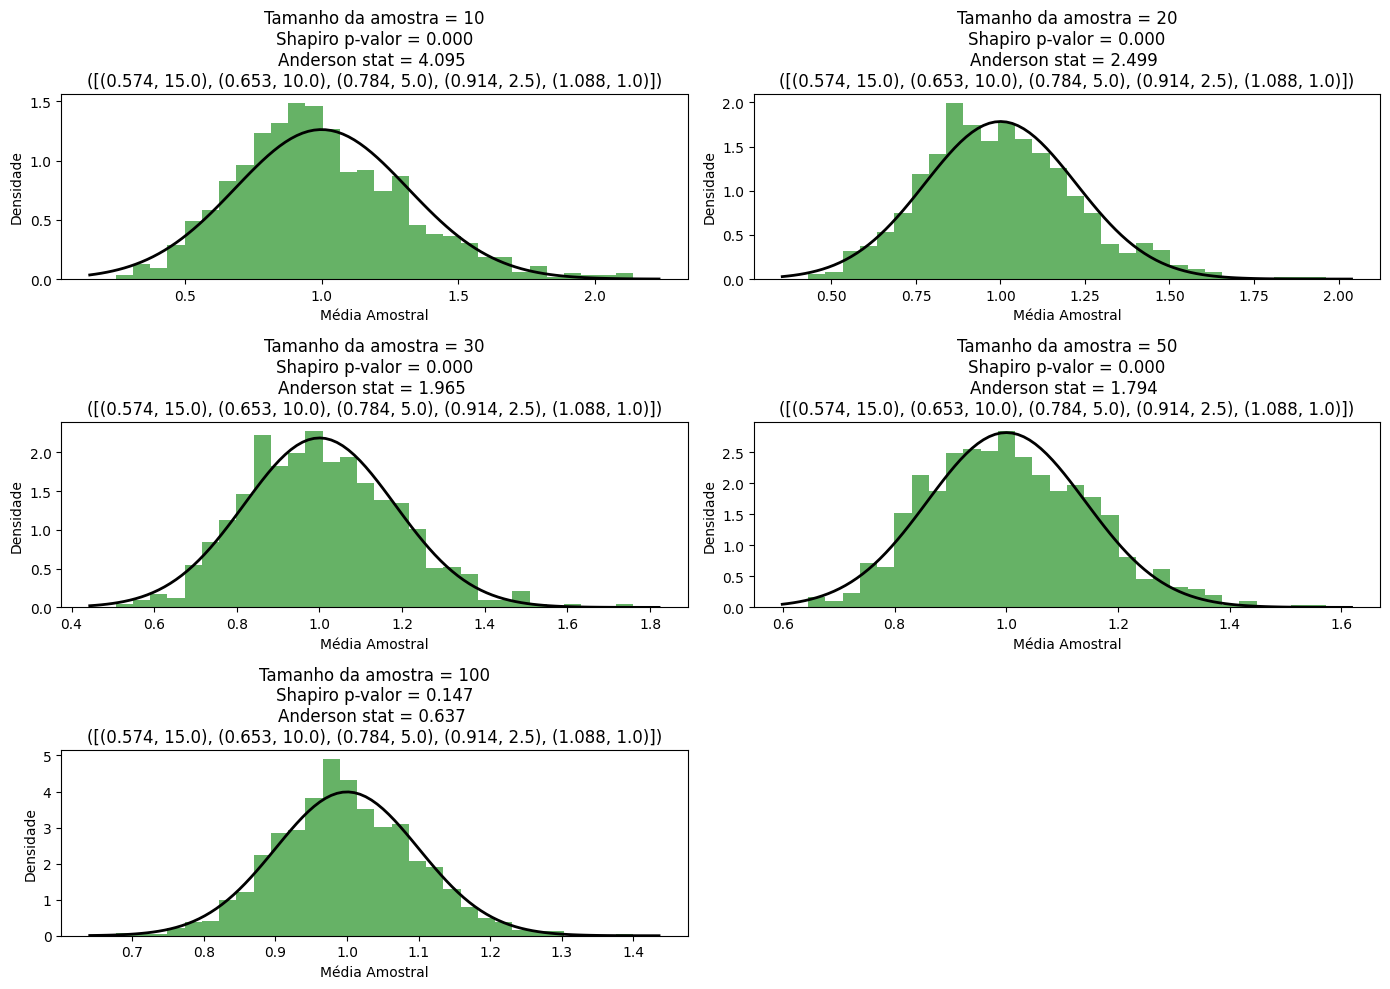

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Distribuição exponencial
scale = 1  # Parâmetro de escala da distribuição exponencial (λ = 1/scale)

# Tamanhos de amostra para testar
sample_sizes = [10, 20, 30, 50, 100]

# Número de amostras a serem geradas
num_samples = 1000

# Preparar a figura para plotar
plt.figure(figsize=(14, 10))

# Iterar sobre diferentes tamanhos de amostra
for i, n in enumerate(sample_sizes, 1):

    # Gerar num_samples amostras de tamanho n da distribuição exponencial
    samples = np.random.exponential(scale, (num_samples, n))

    # Calcular as médias de cada amostra
    sample_means = samples.mean(axis=1)

    # Aplicar testes de normalidade Shapiro Wilk e Anderson Darling
    shapiro_test = stats.shapiro(sample_means)
    anderson_test = stats.anderson(sample_means, dist='norm')
    # significance_level contém os valores críticos para diferentes níveis de significância.
    # O p-valor é então obtido comparando a estatística de teste com os valores críticos e encontrando o valor de significância correspondente ao valor crítico
    # que é maior que a estatística de teste
    anderson_test_critical_values_by_significance_levels = list(zip(anderson_test.critical_values, anderson_test.significance_level))

    # Plotar histogramas das médias amostrais
    plt.subplot(3, 2, i)
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')

    # Plotar a curva normal teórica para comparação
    mean = scale
    std_dev = scale / np.sqrt(n)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std_dev)
    plt.plot(x, p, 'k', linewidth=2)

    # Títulos e legendas
    plt.title(f'Tamanho da amostra = {n}\nShapiro p-valor = {shapiro_test.pvalue:.3f}\nAnderson stat = {anderson_test.statistic:.3f} \n({anderson_test_critical_values_by_significance_levels})')
    plt.xlabel('Média Amostral')
    plt.ylabel('Densidade')

# Ajustar layout
plt.tight_layout()
plt.show()
